In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.special import comb
import scipy.io
import os
import random
import sys
import csv
import pickle 

In [2]:
def binarize(array, threshold):
    """
    Function for binarizing a weighted adjacency matrix.
    
    Parameters:
    -----------------
    array: numpy array to be binarized.
    threshold: float for cutting off the edges.
    
    Returns:
    ----------------
    binarized: numpy array.
    
    """
    binarized = np.zeros(array.shape, dtype = np.int64)
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            if array[i][j] > threshold:
                binarized[i][j] = 1
                binarized[j][i] = 1
            else:
                pass
    return(binarized)

In [3]:
##read data
path = '/Users/bengieru/Desktop/code/Fungi/fungal_networks/'
prefix_Pi = [filename for filename in os.listdir(path) if filename.startswith("Pi")]
prefix_Pv = [filename for filename in os.listdir(path) if filename.startswith("Pv")]
prefix_Sc = [filename for filename in os.listdir(path) if filename.startswith("Sc")]
prefix_Pp = [filename for filename in os.listdir(path) if filename.startswith("Pp")]

prefixed = prefix_Pi + prefix_Sc# + prefix_Sc
prefixed
prefix = random.sample(prefix_Pp, 3)#[prefixed[3]] + [prefixed[4]] + [prefixed[7]]
prefix

['Pp_M_Tokyo_U_N_26h_6.mat',
 'Pp_M_UK_U_N_15h_12.mat',
 'Pp_M_UK_U_N_15h_10.mat']

In [4]:
#read data
files = []
for i, fungi in enumerate(prefix):
    files.append(scipy.io.loadmat(path + fungi))
#files[0]['coordinates']
#files[0]['A'].toarray()

In [5]:
#extract metadata
distance_matrices = {}
coordinates = {}
adjacency_matrices = {}
binarized_connectivity = {}
sizes = []
thresh = 0
for i, fungi in enumerate(prefix):
    coordinates['%s'%fungi] = files[i]['coordinates']
    distance_matrices['%s'%fungi] = cdist(coordinates['%s'%fungi], coordinates['%s'%fungi], 'euclidean')
    adjacency_matrices['%s'%fungi] = files[i]['A']
    binarized_connectivity['%s'%fungi] = binarize(adjacency_matrices['%s'%fungi].toarray(),thresh)
    sizes.append(adjacency_matrices['%s'%fungi].shape[0])

In [6]:
distributions = {}
for i, fungi in enumerate(prefix):
    edge_dist = []
    for j, e in enumerate(np.array(np.nonzero(binarized_connectivity['%s'%fungi])).T):
        edge_dist.append((e[0],e[1],distance_matrices['%s'%fungi][e[0]][e[1]]))

    distribution = []
    for triple in edge_dist:
        distribution.append(triple[2])
    distributions['%s'%fungi] = distribution

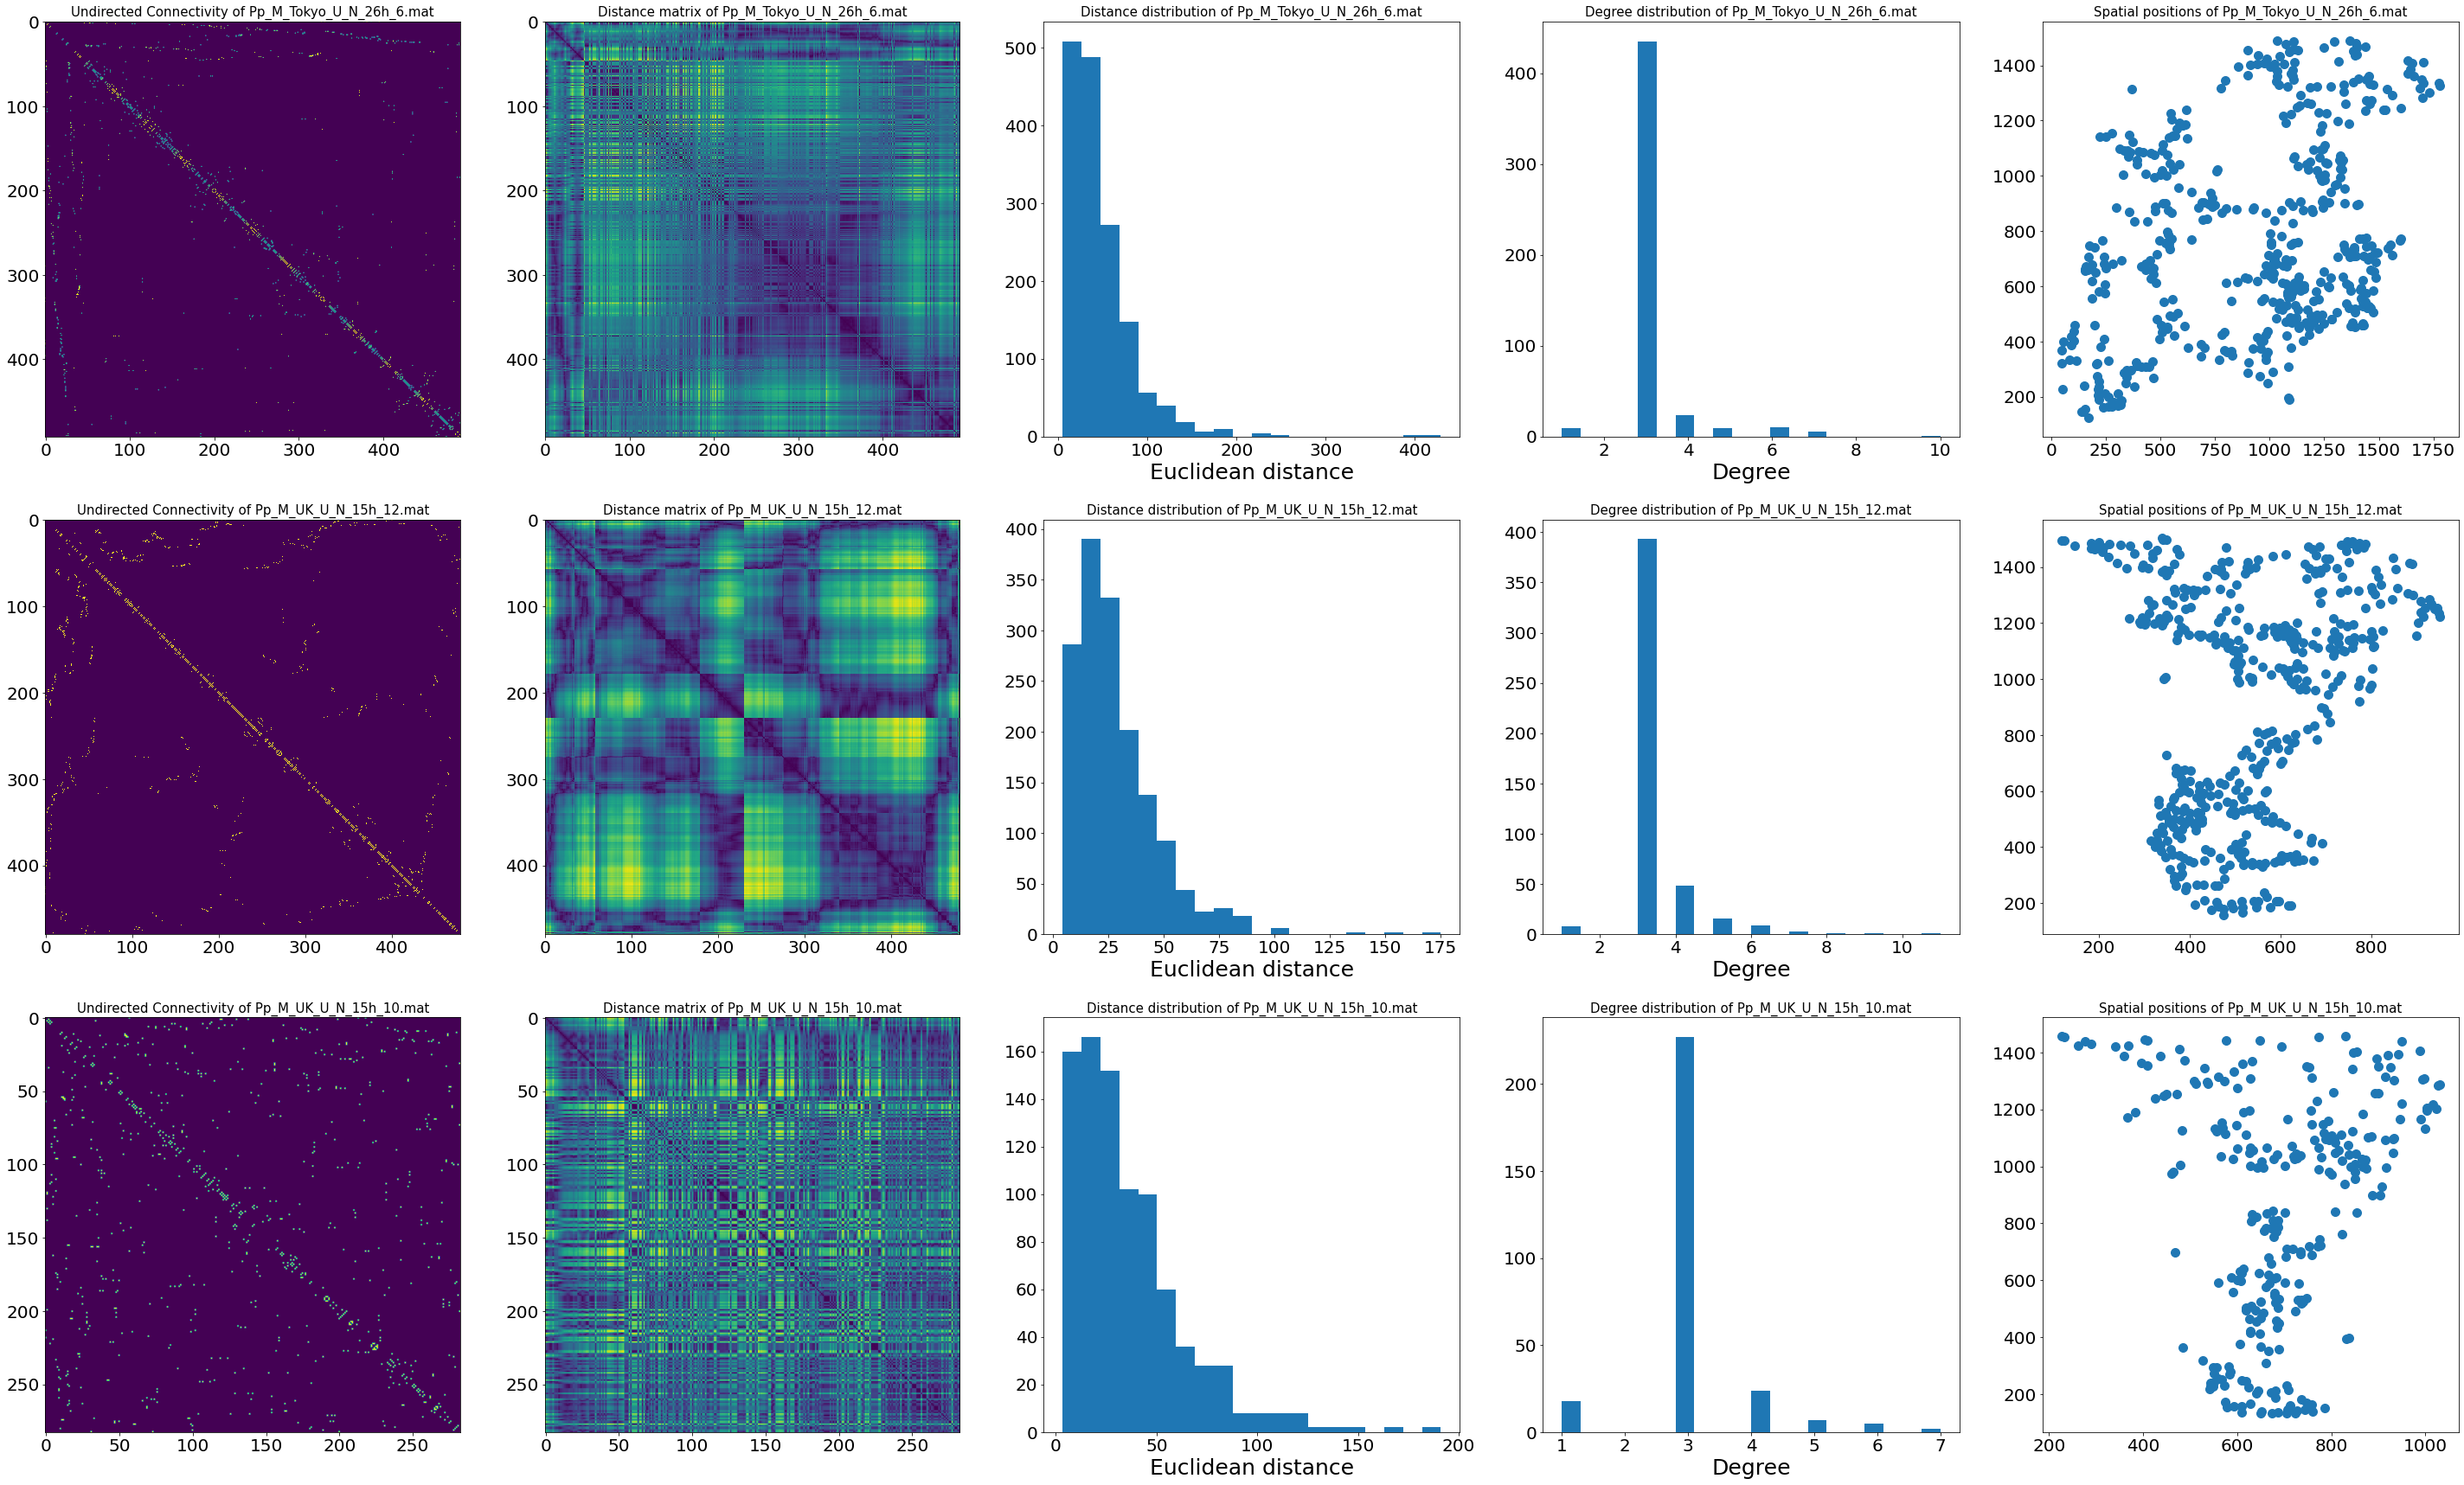

In [15]:
fig, ax = plt.subplots(3,5, figsize =(50,30))
distance_bins = []
for i, fungi in enumerate(prefix):
    ax[i][0].imshow(binarized_connectivity['%s'%fungi]) 
    ax[i][0].set_title('Undirected Connectivity of %s'%fungi, fontsize = 15)
    ax[i][0].tick_params(axis = 'both', labelsize = 20)

    ax[i][1].imshow(distance_matrices['%s'%fungi]) 
    ax[i][1].set_title('Distance matrix of %s'%fungi, fontsize = 15)
    ax[i][1].tick_params(axis = 'both', labelsize = 20)

    n, bins, patches = ax[i][2].hist(distributions['%s'%fungi], bins = 20)
    ax[i][2].set_title('Distance distribution of %s'%fungi, fontsize = 15)
    ax[i][2].tick_params(axis = 'both', labelsize = 20)
    ax[i][2].set_xlabel('Euclidean distance', fontsize = 25)
    distance_bins.append(bins)
    
    n, bins, patches = ax[i][3].hist(binarized_connectivity['%s'%fungi].sum(axis = 1), bins = 20)
    ax[i][3].set_title('Degree distribution of %s'%fungi, fontsize = 15)
    ax[i][3].tick_params(axis = 'both', labelsize = 20)
    ax[i][3].set_xlabel('Degree', fontsize = 25)

# for i in range(0,4):
#     patches[i].set_facecolor('b')
# for i in range(4,len(patches)):    
#     patches[i].set_facecolor('r')
    
# handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['b', 'r']]
# labels= [['Geometric Edges', 'Non-Geometric Edges']]
# plt.legend(handles, labels)

    ax[i][4].scatter(coordinates['%s'%fungi][:,0], coordinates['%s'%fungi][:,1], s = 100)
    ax[i][4].set_title('Spatial positions of %s'%fungi, fontsize = 15)
    ax[i][4].tick_params(axis = 'both', labelsize = 20)

In [19]:
distance_matrices['%s'%fungi][:20,:20]

array([[  0.        , 201.15802338, 247.60546226, 346.01807939,
        365.71102626, 309.08978603, 450.43481419, 495.68927002,
        447.8465114 , 612.31418916, 612.36483074, 690.1732175 ,
        788.33202644, 838.17055199, 854.65320792, 866.53396868,
        922.0124953 , 882.8604861 , 871.31242537, 756.36883041],
       [201.15802338,   0.        , 191.1979377 , 192.30352303,
        195.26762575, 135.42171725, 257.6930243 , 317.58754793,
        284.51915628, 444.80162452, 481.11117756, 562.4645395 ,
        650.85786101, 689.02550046, 693.34395505, 694.59984363,
        755.50679412, 734.19417275, 730.49371684, 636.91739866],
       [247.60546226, 191.1979377 ,   0.        , 146.50344391,
        182.58950872, 315.38213339, 291.94502906, 298.53399343,
        236.50807736, 391.64454425, 368.22326776, 444.22352759,
        544.07088294, 597.95008178, 621.50876177, 642.55280177,
        691.96480602, 641.96167608, 627.47044058, 508.97449552],
       [346.01807939, 192.30352303, 1